# LSM9DS0 Sensor Data Visualization

This notebook provides visualization tools for the 9-DOF sensor data collected from the LSM9DS0.

## Data Format
The CSV file contains the following columns:
- `timestamp_ms`: Time in milliseconds since start
- `ax_g, ay_g, az_g`: Accelerometer data (g's)
- `gx_dps, gy_dps, gz_dps`: Gyroscope data (degrees per second)
- `mx_gauss, my_gauss, mz_gauss`: Magnetometer data (gauss)
- `temp_c`: Temperature (Celsius)

## Usage
1. Update the `filename` variable below to point to your sensor data CSV file
2. Run all cells to generate the 4 plots:
   - Gyroscope (x, y, z vs time)
   - Accelerometer (x, y, z vs time)
   - Magnetometer (x, y, z vs time)
   - Temperature (temp vs time)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

# Configure matplotlib for better looking plots
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

In [3]:
# CONFIGURATION: Update this path to your sensor data file
# You can use a specific file or use glob pattern to find the latest file

# Option 1: Specify a specific file
# filename = 'sensor_data_20231201_120000.csv'

# Option 2: Automatically find the most recent sensor data file
sensor_files = glob.glob('sensor_data_*.csv')
if sensor_files:
    filename = max(sensor_files, key=os.path.getctime)  # Get the most recent file
    print(f"Loading most recent file: {filename}")
else:
    # Default to a placeholder - update this path!
    filename = 'sensor_data.csv'
    print(f"No sensor_data_*.csv files found. Using default: {filename}")
    print("Please update the filename variable with the path to your data file.")

Loading most recent file: sensor_data_20251104_102135.csv


In [4]:
# Load the sensor data
try:
    df = pd.read_csv(filename)
    
    # Convert timestamp from milliseconds to seconds for better readability
    df['time_s'] = df['timestamp_ms'] / 1000.0
    
    print(f"Data loaded successfully!")
    print(f"Total samples: {len(df)}")
    print(f"Duration: {df['time_s'].max():.2f} seconds")
    print(f"\nFirst few rows:")
    display(df.head())
    
    print(f"\nData statistics:")
    display(df.describe())
    
except FileNotFoundError:
    print(f"Error: File '{filename}' not found.")
    print("Please update the filename variable in the previous cell.")
except Exception as e:
    print(f"Error loading data: {e}")

Data loaded successfully!
Total samples: 7893
Duration: 39.46 seconds

First few rows:


,timestamp_ms,ax_g,ay_g,az_g,gx_dps,gy_dps,gz_dps,mx_gauss,my_gauss,mz_gauss,temp_c,time_s
0,3,-0.071126,0.077165,-1.018150,0.18375,-1.80250,-4.60250,-0.37568,0.17064,-0.37784,25.750,0.003
1,8,-0.067649,0.062525,-1.018150,0.33250,-1.35625,-4.73375,-0.37568,0.17064,-0.37616,25.875,0.008
2,13,-0.067649,0.062525,-0.978135,0.33250,-1.35625,-4.73375,-0.37640,0.17088,-0.37616,25.875,0.013
3,18,-0.073200,0.062159,-0.978135,-0.21000,-1.28625,-4.52375,-0.37640,0.17088,-0.37616,25.875,0.018
4,23,-0.073200,0.062159,-1.018820,-0.21000,-1.28625,-4.52375,-0.37640,0.17088,-0.37616,25.875,0.023



Data statistics:


,timestamp_ms,ax_g,ay_g,az_g,gx_dps,gy_dps,gz_dps,mx_gauss,my_gauss,mz_gauss,temp_c,time_s
count,7893.000000,7892.000000,7892.000000,7892.000000,7892.000000,7892.000000,7892.000000,7892.000000,7892.000000,7892.000000,7892.000000,7893.000000
mean,19733.888382,-0.065844,0.069119,-0.999452,-0.045684,-1.725543,-4.934433,-0.379628,0.123536,-0.373880,25.981548,19.733888
std,11393.348523,0.080010,0.152507,0.061437,15.164695,8.118742,11.546378,0.055674,0.096667,0.045715,0.165322,11.393349
min,3.000000,-0.463295,-0.473482,-1.288810,-88.926200,-38.893700,-55.833800,-0.511200,-0.183280,-0.445600,25.375000,0.003000
25%,9869.000000,-0.070455,0.062403,-1.018150,-0.288750,-2.003750,-5.031250,-0.411760,0.121760,-0.397760,25.875000,9.869000
50%,19734.000000,-0.068686,0.063562,-1.015830,-0.052500,-1.732500,-4.821250,-0.377840,0.135520,-0.384000,26.000000,19.734000
75%,29599.000000,-0.067100,0.064721,-1.012600,0.183750,-1.461250,-4.620000,-0.376080,0.170160,-0.373600,26.125000,29.599000
max,39464.000000,0.340380,0.812337,-0.566995,91.358700,46.138800,80.281200,-0.071520,0.308880,-0.196400,26.500000,39.464000


## Plot 1: Gyroscope Data
Rotation rates in degrees per second around x, y, and z axes

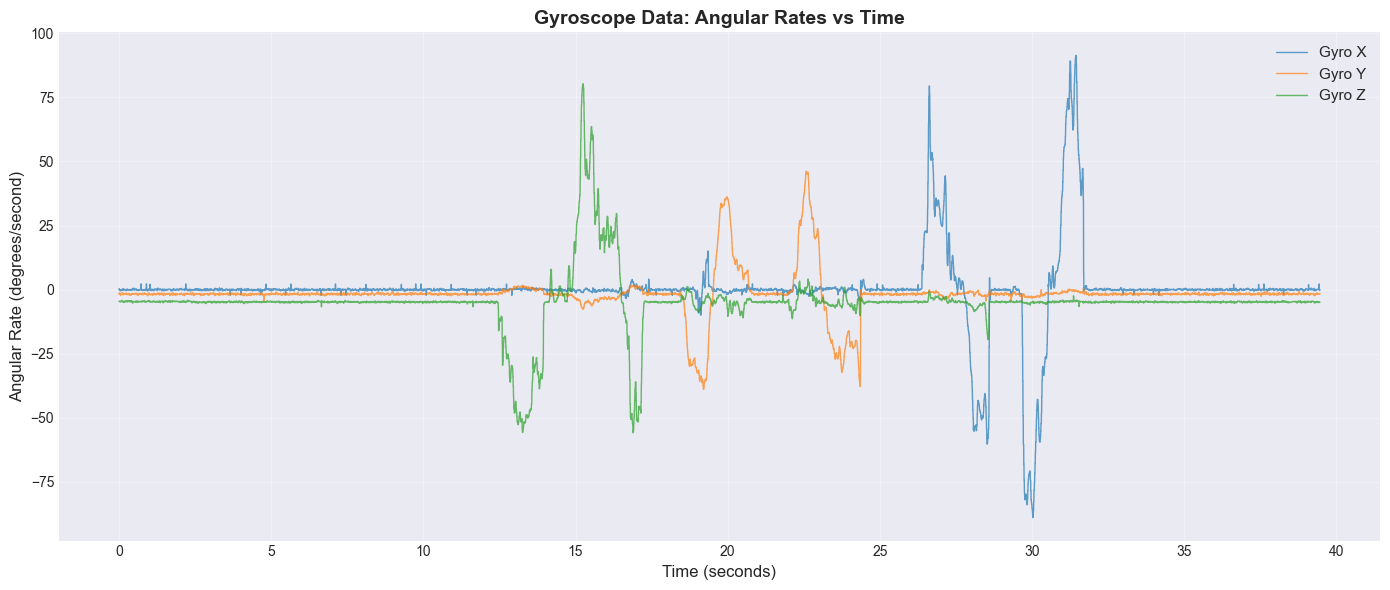

Gyroscope Statistics:
  X-axis: mean=-0.05, std=15.16, range=[-88.93, 91.36]
  Y-axis: mean=-1.73, std=8.12, range=[-38.89, 46.14]
  Z-axis: mean=-4.93, std=11.55, range=[-55.83, 80.28]


In [5]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(df['time_s'], df['gx_dps'], label='Gyro X', alpha=0.7, linewidth=1)
ax.plot(df['time_s'], df['gy_dps'], label='Gyro Y', alpha=0.7, linewidth=1)
ax.plot(df['time_s'], df['gz_dps'], label='Gyro Z', alpha=0.7, linewidth=1)

ax.set_xlabel('Time (seconds)', fontsize=12)
ax.set_ylabel('Angular Rate (degrees/second)', fontsize=12)
ax.set_title('Gyroscope Data: Angular Rates vs Time', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print("Gyroscope Statistics:")
print(f"  X-axis: mean={df['gx_dps'].mean():.2f}, std={df['gx_dps'].std():.2f}, range=[{df['gx_dps'].min():.2f}, {df['gx_dps'].max():.2f}]")
print(f"  Y-axis: mean={df['gy_dps'].mean():.2f}, std={df['gy_dps'].std():.2f}, range=[{df['gy_dps'].min():.2f}, {df['gy_dps'].max():.2f}]")
print(f"  Z-axis: mean={df['gz_dps'].mean():.2f}, std={df['gz_dps'].std():.2f}, range=[{df['gz_dps'].min():.2f}, {df['gz_dps'].max():.2f}]")

## Plot 2: Accelerometer Data
Acceleration in g's along x, y, and z axes

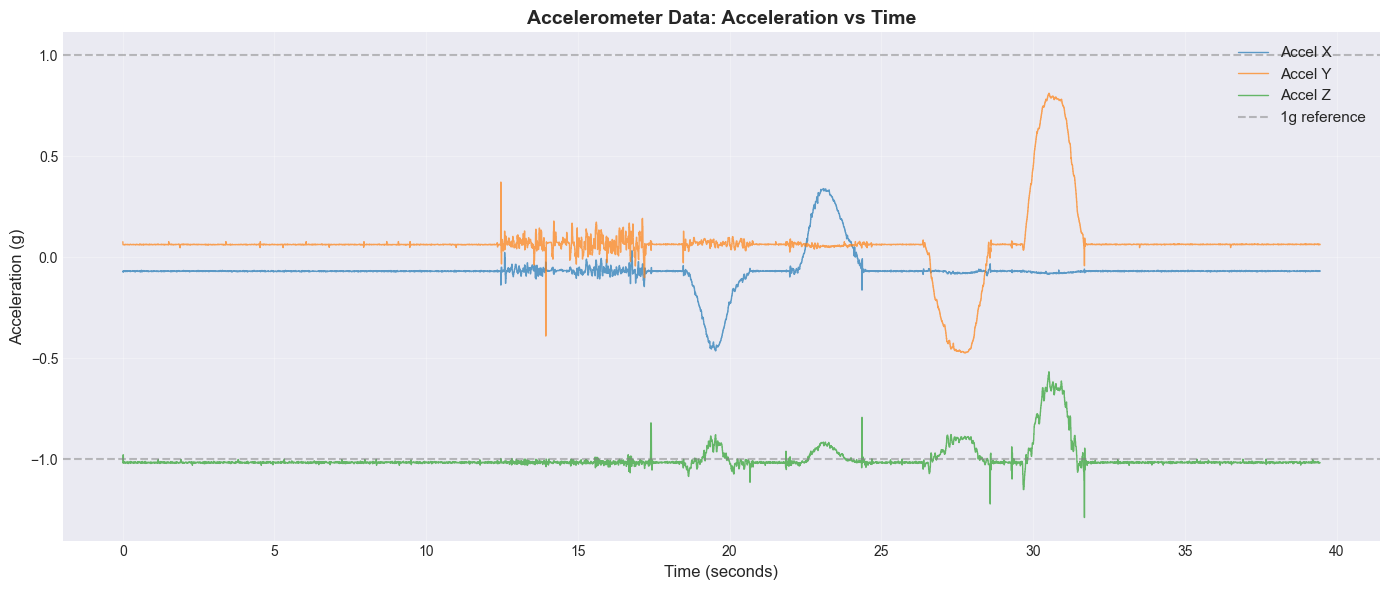

Accelerometer Statistics:
  X-axis: mean=-0.066, std=0.080, range=[-0.463, 0.340]
  Y-axis: mean=0.069, std=0.153, range=[-0.473, 0.812]
  Z-axis: mean=-0.999, std=0.061, range=[-1.289, -0.567]


In [8]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(df['time_s'], df['ax_g'], label='Accel X', alpha=0.7, linewidth=1)
ax.plot(df['time_s'], df['ay_g'], label='Accel Y', alpha=0.7, linewidth=1)
ax.plot(df['time_s'], df['az_g'], label='Accel Z', alpha=0.7, linewidth=1)

# Add reference line at 1g
ax.axhline(y=1.0, color='gray', linestyle='--', alpha=0.5, label='1g reference')
ax.axhline(y=-1.0, color='gray', linestyle='--', alpha=0.5)

ax.set_xlabel('Time (seconds)', fontsize=12)
ax.set_ylabel('Acceleration (g)', fontsize=12)
ax.set_title('Accelerometer Data: Acceleration vs Time', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print("Accelerometer Statistics:")
print(f"  X-axis: mean={df['ax_g'].mean():.3f}, std={df['ax_g'].std():.3f}, range=[{df['ax_g'].min():.3f}, {df['ax_g'].max():.3f}]")
print(f"  Y-axis: mean={df['ay_g'].mean():.3f}, std={df['ay_g'].std():.3f}, range=[{df['ay_g'].min():.3f}, {df['ay_g'].max():.3f}]")
print(f"  Z-axis: mean={df['az_g'].mean():.3f}, std={df['az_g'].std():.3f}, range=[{df['az_g'].min():.3f}, {df['az_g'].max():.3f}]")

## Plot 3: Magnetometer Data
Magnetic field strength in gauss along x, y, and z axes

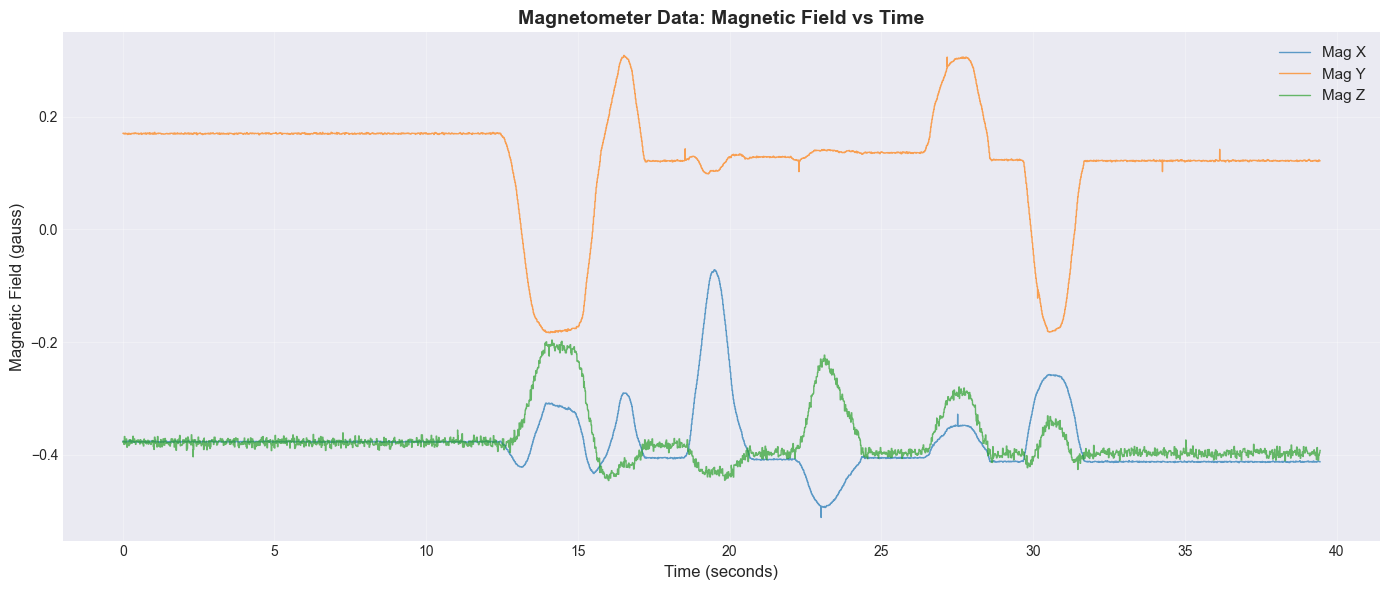

Magnetometer Statistics:
  X-axis: mean=-0.380, std=0.056, range=[-0.511, -0.072]
  Y-axis: mean=0.124, std=0.097, range=[-0.183, 0.309]
  Z-axis: mean=-0.374, std=0.046, range=[-0.446, -0.196]

  Total magnitude: mean=0.559, std=0.039


In [9]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(df['time_s'], df['mx_gauss'], label='Mag X', alpha=0.7, linewidth=1)
ax.plot(df['time_s'], df['my_gauss'], label='Mag Y', alpha=0.7, linewidth=1)
ax.plot(df['time_s'], df['mz_gauss'], label='Mag Z', alpha=0.7, linewidth=1)

ax.set_xlabel('Time (seconds)', fontsize=12)
ax.set_ylabel('Magnetic Field (gauss)', fontsize=12)
ax.set_title('Magnetometer Data: Magnetic Field vs Time', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print("Magnetometer Statistics:")
print(f"  X-axis: mean={df['mx_gauss'].mean():.3f}, std={df['mx_gauss'].std():.3f}, range=[{df['mx_gauss'].min():.3f}, {df['mx_gauss'].max():.3f}]")
print(f"  Y-axis: mean={df['my_gauss'].mean():.3f}, std={df['my_gauss'].std():.3f}, range=[{df['my_gauss'].min():.3f}, {df['my_gauss'].max():.3f}]")
print(f"  Z-axis: mean={df['mz_gauss'].mean():.3f}, std={df['mz_gauss'].std():.3f}, range=[{df['mz_gauss'].min():.3f}, {df['mz_gauss'].max():.3f}]")

# Calculate total magnetic field magnitude
df['mag_magnitude'] = np.sqrt(df['mx_gauss']**2 + df['my_gauss']**2 + df['mz_gauss']**2)
print(f"\n  Total magnitude: mean={df['mag_magnitude'].mean():.3f}, std={df['mag_magnitude'].std():.3f}")

## Plot 4: Temperature Data
Temperature sensor readings in Celsius

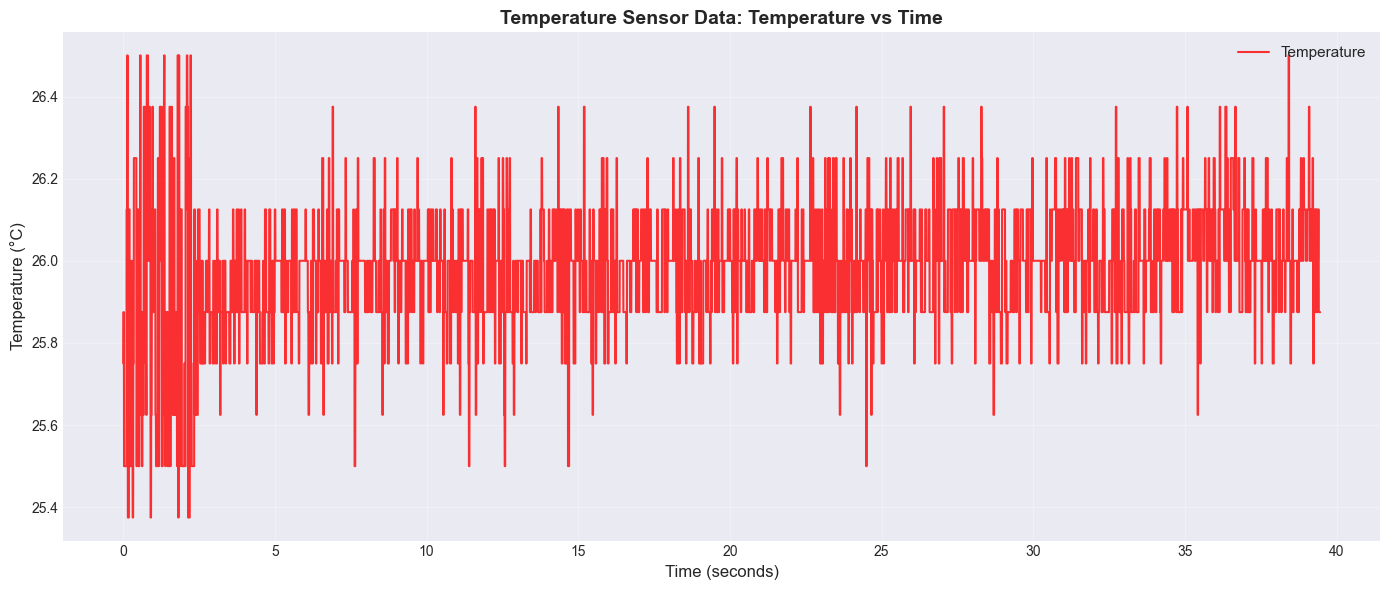

Temperature Statistics:
  Mean: 25.98°C
  Std:  0.17°C
  Min:  25.38°C
  Max:  26.50°C
  Range: 1.12°C


In [10]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(df['time_s'], df['temp_c'], label='Temperature', alpha=0.8, linewidth=1.5, color='red')

ax.set_xlabel('Time (seconds)', fontsize=12)
ax.set_ylabel('Temperature (°C)', fontsize=12)
ax.set_title('Temperature Sensor Data: Temperature vs Time', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print("Temperature Statistics:")
print(f"  Mean: {df['temp_c'].mean():.2f}°C")
print(f"  Std:  {df['temp_c'].std():.2f}°C")
print(f"  Min:  {df['temp_c'].min():.2f}°C")
print(f"  Max:  {df['temp_c'].max():.2f}°C")
print(f"  Range: {df['temp_c'].max() - df['temp_c'].min():.2f}°C")

## Optional: Combined View
All sensors in a single figure with subplots

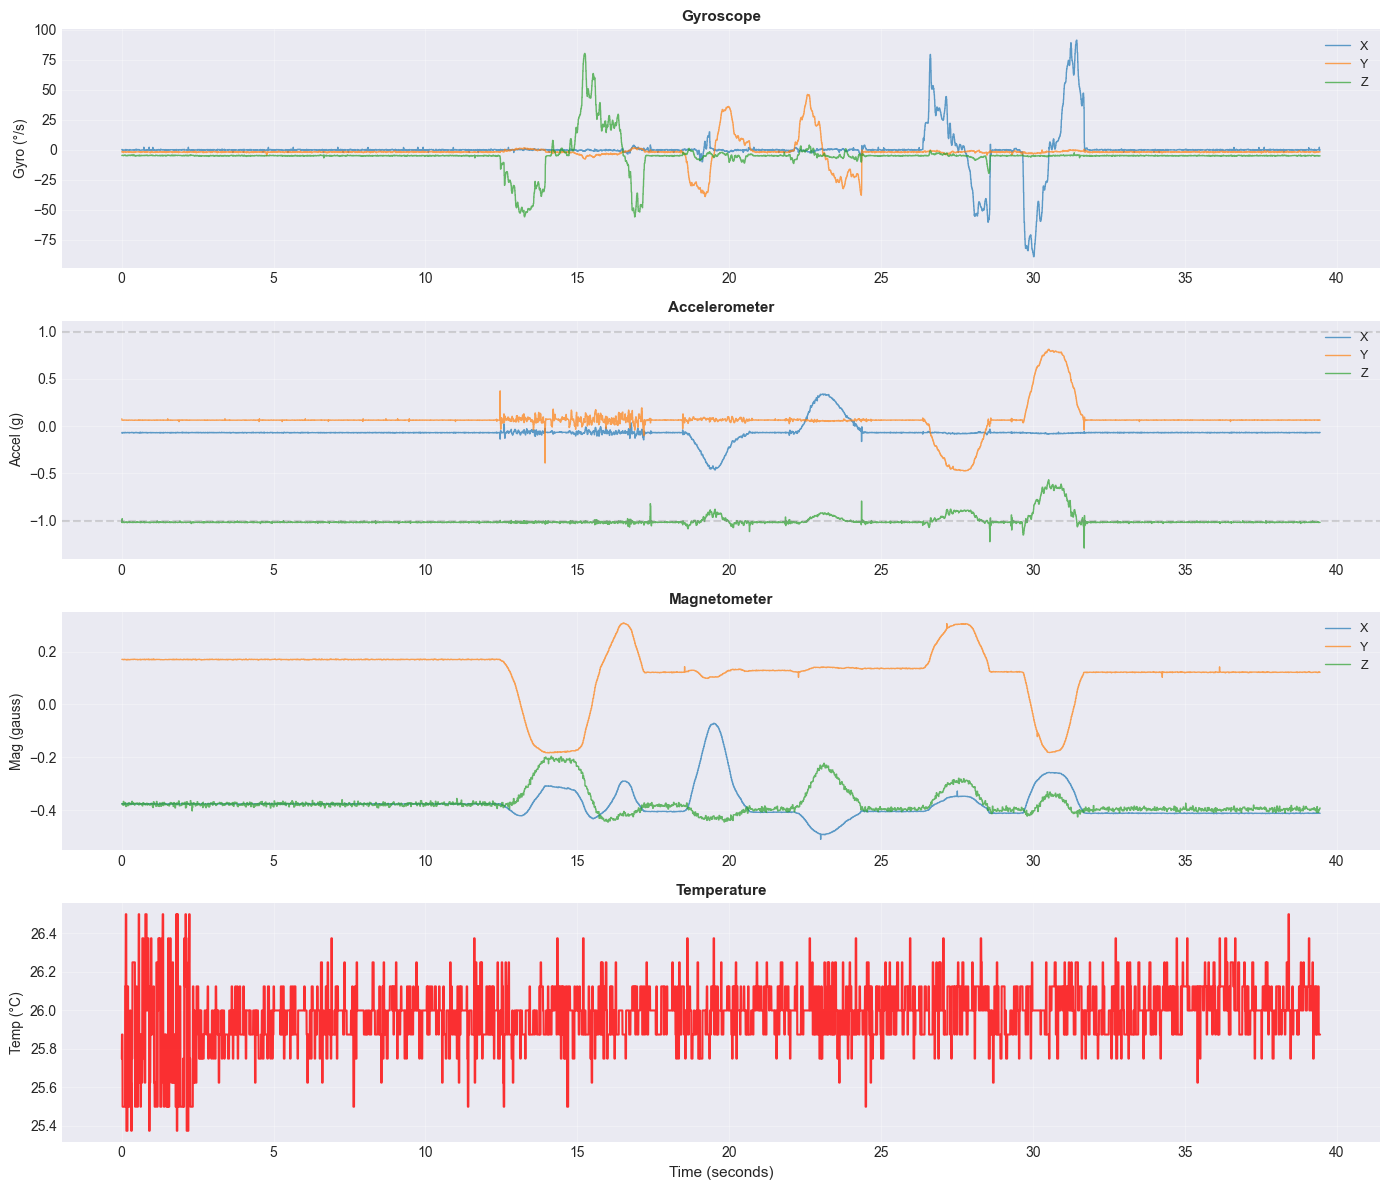

In [11]:
fig, axes = plt.subplots(4, 1, figsize=(14, 12))

# Gyroscope
axes[0].plot(df['time_s'], df['gx_dps'], label='X', alpha=0.7, linewidth=1)
axes[0].plot(df['time_s'], df['gy_dps'], label='Y', alpha=0.7, linewidth=1)
axes[0].plot(df['time_s'], df['gz_dps'], label='Z', alpha=0.7, linewidth=1)
axes[0].set_ylabel('Gyro (°/s)', fontsize=10)
axes[0].set_title('Gyroscope', fontsize=11, fontweight='bold')
axes[0].legend(loc='upper right', fontsize=9)
axes[0].grid(True, alpha=0.3)

# Accelerometer
axes[1].plot(df['time_s'], df['ax_g'], label='X', alpha=0.7, linewidth=1)
axes[1].plot(df['time_s'], df['ay_g'], label='Y', alpha=0.7, linewidth=1)
axes[1].plot(df['time_s'], df['az_g'], label='Z', alpha=0.7, linewidth=1)
axes[1].axhline(y=1.0, color='gray', linestyle='--', alpha=0.3)
axes[1].axhline(y=-1.0, color='gray', linestyle='--', alpha=0.3)
axes[1].set_ylabel('Accel (g)', fontsize=10)
axes[1].set_title('Accelerometer', fontsize=11, fontweight='bold')
axes[1].legend(loc='upper right', fontsize=9)
axes[1].grid(True, alpha=0.3)

# Magnetometer
axes[2].plot(df['time_s'], df['mx_gauss'], label='X', alpha=0.7, linewidth=1)
axes[2].plot(df['time_s'], df['my_gauss'], label='Y', alpha=0.7, linewidth=1)
axes[2].plot(df['time_s'], df['mz_gauss'], label='Z', alpha=0.7, linewidth=1)
axes[2].set_ylabel('Mag (gauss)', fontsize=10)
axes[2].set_title('Magnetometer', fontsize=11, fontweight='bold')
axes[2].legend(loc='upper right', fontsize=9)
axes[2].grid(True, alpha=0.3)

# Temperature
axes[3].plot(df['time_s'], df['temp_c'], alpha=0.8, linewidth=1.5, color='red')
axes[3].set_ylabel('Temp (°C)', fontsize=10)
axes[3].set_xlabel('Time (seconds)', fontsize=11)
axes[3].set_title('Temperature', fontsize=11, fontweight='bold')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Optional: Rolling Average Analysis
Compute and visualize rolling averages to see trends more clearly

In [23]:
# Configure rolling window size (in number of samples)
# At 200 Hz, a window of 200 samples = 1 second
window_size = 200

# Calculate rolling averages
df['gx_dps_rolling'] = df['gx_dps'].rolling(window=window_size, center=True).mean()
df['gy_dps_rolling'] = df['gy_dps'].rolling(window=window_size, center=True).mean()
df['gz_dps_rolling'] = df['gz_dps'].rolling(window=window_size, center=True).mean()

df['ax_g_rolling'] = df['ax_g'].rolling(window=window_size, center=True).mean()
df['ay_g_rolling'] = df['ay_g'].rolling(window=window_size, center=True).mean()
df['az_g_rolling'] = df['az_g'].rolling(window=window_size, center=True).mean()

df['mx_gauss_rolling'] = df['mx_gauss'].rolling(window=window_size, center=True).mean()
df['my_gauss_rolling'] = df['my_gauss'].rolling(window=window_size, center=True).mean()
df['mz_gauss_rolling'] = df['mz_gauss'].rolling(window=window_size, center=True).mean()

df['temp_c_rolling'] = df['temp_c'].rolling(window=window_size, center=True).mean()

print(f"Rolling averages calculated with window size of {window_size} samples")
print(f"At 200 Hz sampling rate, this corresponds to {window_size/200:.2f} seconds")

Rolling averages calculated with window size of 200 samples
At 200 Hz sampling rate, this corresponds to 1.00 seconds


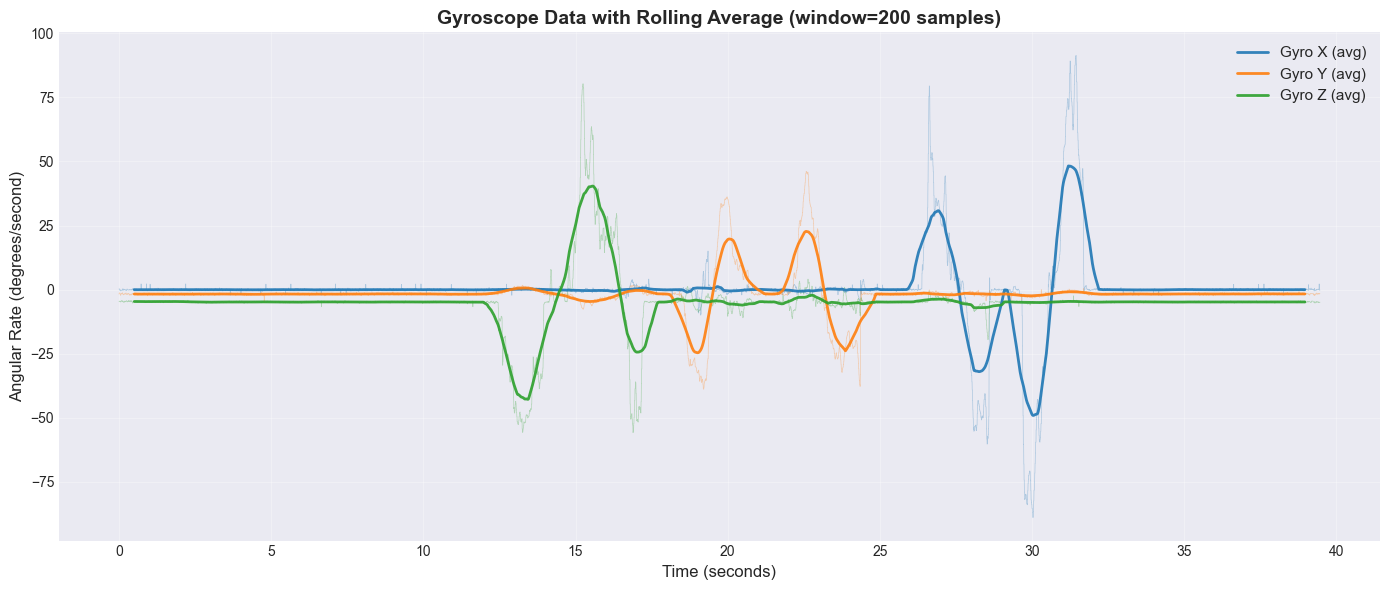

In [24]:
# Plot gyroscope with rolling average
fig, ax = plt.subplots(figsize=(14, 6))

# Raw data (lighter, thinner lines)
ax.plot(df['time_s'], df['gx_dps'], alpha=0.3, linewidth=0.5, color='C0')
ax.plot(df['time_s'], df['gy_dps'], alpha=0.3, linewidth=0.5, color='C1')
ax.plot(df['time_s'], df['gz_dps'], alpha=0.3, linewidth=0.5, color='C2')

# Rolling averages (darker, thicker lines)
ax.plot(df['time_s'], df['gx_dps_rolling'], label='Gyro X (avg)', alpha=0.9, linewidth=2, color='C0')
ax.plot(df['time_s'], df['gy_dps_rolling'], label='Gyro Y (avg)', alpha=0.9, linewidth=2, color='C1')
ax.plot(df['time_s'], df['gz_dps_rolling'], label='Gyro Z (avg)', alpha=0.9, linewidth=2, color='C2')

ax.set_xlabel('Time (seconds)', fontsize=12)
ax.set_ylabel('Angular Rate (degrees/second)', fontsize=12)
ax.set_title(f'Gyroscope Data with Rolling Average (window={window_size} samples)', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

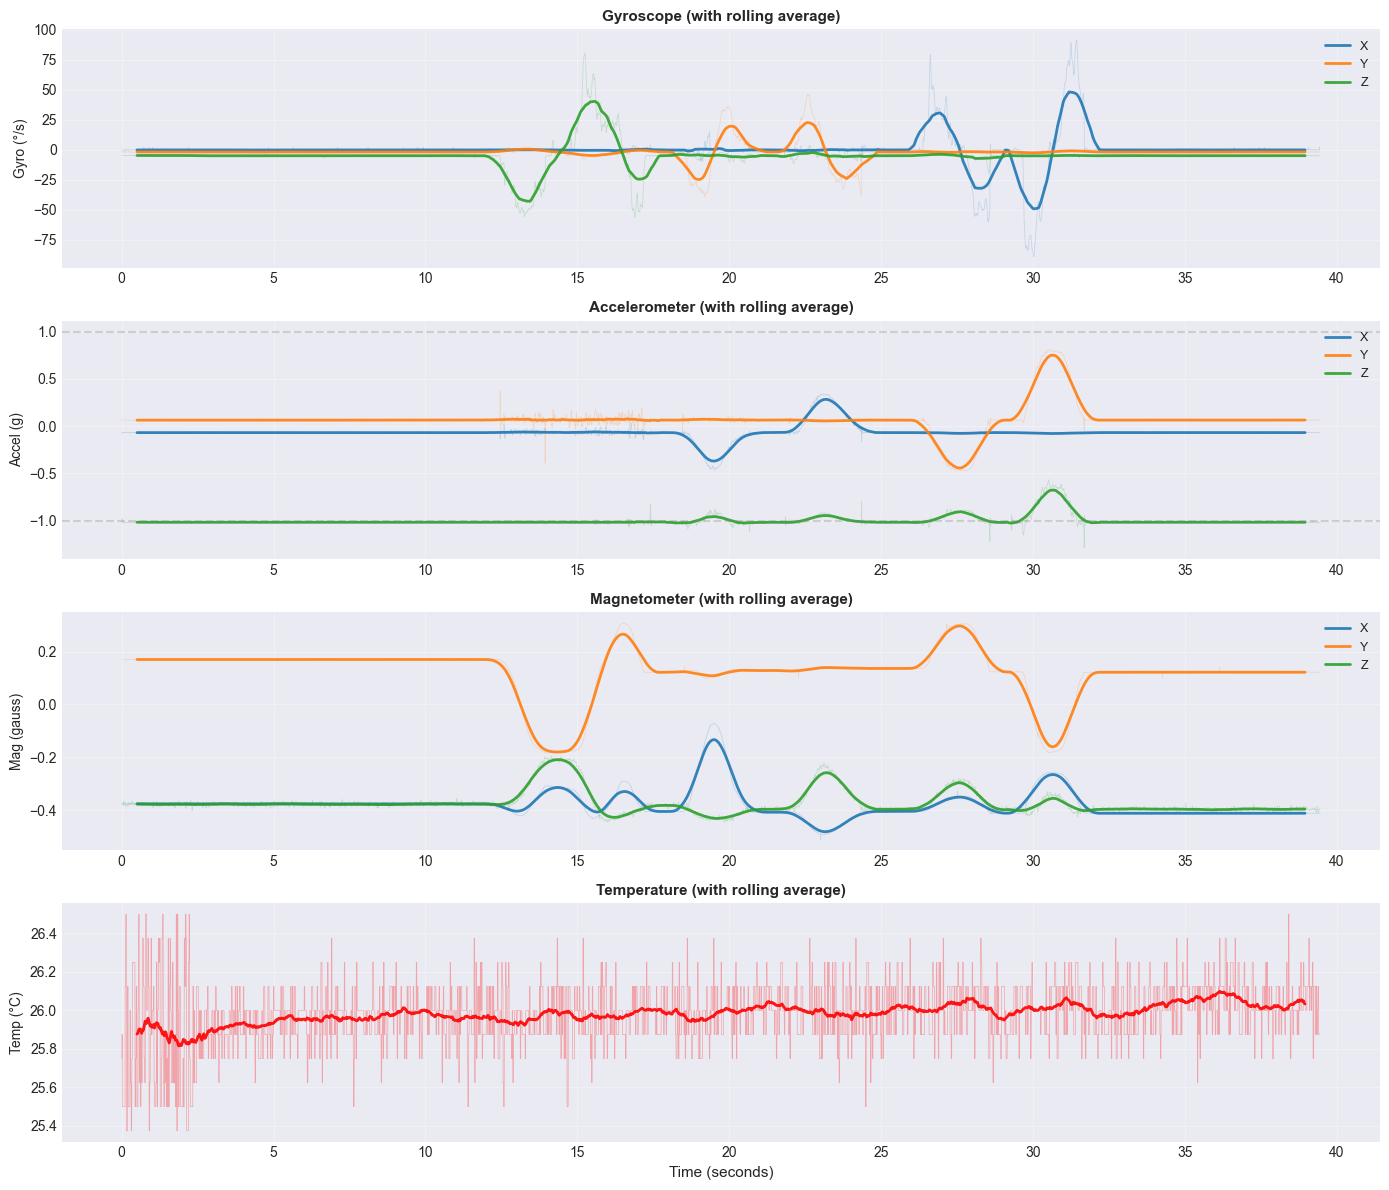

In [25]:
# Plot all sensors with rolling averages in subplots
fig, axes = plt.subplots(4, 1, figsize=(14, 12))

# Gyroscope
axes[0].plot(df['time_s'], df['gx_dps'], alpha=0.2, linewidth=0.5, color='C0')
axes[0].plot(df['time_s'], df['gy_dps'], alpha=0.2, linewidth=0.5, color='C1')
axes[0].plot(df['time_s'], df['gz_dps'], alpha=0.2, linewidth=0.5, color='C2')
axes[0].plot(df['time_s'], df['gx_dps_rolling'], label='X', alpha=0.9, linewidth=2, color='C0')
axes[0].plot(df['time_s'], df['gy_dps_rolling'], label='Y', alpha=0.9, linewidth=2, color='C1')
axes[0].plot(df['time_s'], df['gz_dps_rolling'], label='Z', alpha=0.9, linewidth=2, color='C2')
axes[0].set_ylabel('Gyro (°/s)', fontsize=10)
axes[0].set_title('Gyroscope (with rolling average)', fontsize=11, fontweight='bold')
axes[0].legend(loc='upper right', fontsize=9)
axes[0].grid(True, alpha=0.3)

# Accelerometer
axes[1].plot(df['time_s'], df['ax_g'], alpha=0.2, linewidth=0.5, color='C0')
axes[1].plot(df['time_s'], df['ay_g'], alpha=0.2, linewidth=0.5, color='C1')
axes[1].plot(df['time_s'], df['az_g'], alpha=0.2, linewidth=0.5, color='C2')
axes[1].plot(df['time_s'], df['ax_g_rolling'], label='X', alpha=0.9, linewidth=2, color='C0')
axes[1].plot(df['time_s'], df['ay_g_rolling'], label='Y', alpha=0.9, linewidth=2, color='C1')
axes[1].plot(df['time_s'], df['az_g_rolling'], label='Z', alpha=0.9, linewidth=2, color='C2')
axes[1].axhline(y=1.0, color='gray', linestyle='--', alpha=0.3)
axes[1].axhline(y=-1.0, color='gray', linestyle='--', alpha=0.3)
axes[1].set_ylabel('Accel (g)', fontsize=10)
axes[1].set_title('Accelerometer (with rolling average)', fontsize=11, fontweight='bold')
axes[1].legend(loc='upper right', fontsize=9)
axes[1].grid(True, alpha=0.3)

# Magnetometer
axes[2].plot(df['time_s'], df['mx_gauss'], alpha=0.2, linewidth=0.5, color='C0')
axes[2].plot(df['time_s'], df['my_gauss'], alpha=0.2, linewidth=0.5, color='C1')
axes[2].plot(df['time_s'], df['mz_gauss'], alpha=0.2, linewidth=0.5, color='C2')
axes[2].plot(df['time_s'], df['mx_gauss_rolling'], label='X', alpha=0.9, linewidth=2, color='C0')
axes[2].plot(df['time_s'], df['my_gauss_rolling'], label='Y', alpha=0.9, linewidth=2, color='C1')
axes[2].plot(df['time_s'], df['mz_gauss_rolling'], label='Z', alpha=0.9, linewidth=2, color='C2')
axes[2].set_ylabel('Mag (gauss)', fontsize=10)
axes[2].set_title('Magnetometer (with rolling average)', fontsize=11, fontweight='bold')
axes[2].legend(loc='upper right', fontsize=9)
axes[2].grid(True, alpha=0.3)

# Temperature
axes[3].plot(df['time_s'], df['temp_c'], alpha=0.3, linewidth=0.5, color='red')
axes[3].plot(df['time_s'], df['temp_c_rolling'], alpha=0.9, linewidth=2, color='red')
axes[3].set_ylabel('Temp (°C)', fontsize=10)
axes[3].set_xlabel('Time (seconds)', fontsize=11)
axes[3].set_title('Temperature (with rolling average)', fontsize=11, fontweight='bold')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()